In [1]:
import pandas as pd
import os

from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "dark", 
        color_codes = True,
        font_scale = 1.5)

In [2]:
def read_image_data(data_path, subset=False):

    folders = sorted(os.listdir(data_path))
    images, labels = [], []
    label_dict = {}
        
    for label_no in range(len(folders)):
        folder = folders[label_no]
        label_dict[label_no] = folder
        # oslistdir = sorted(os.listdir(f"{data_path}/{folder}")) 
        oslistdir = sorted(os.listdir(os.path.join(os.getcwd(),data_path,folder))) 
        oslistdir = oslistdir[:10] if subset else oslistdir
        
        for image_name in oslistdir:

            image_path = f"{data_path}/{folders[label_no]}/{image_name}"
            
            # Convert image value into np array
            image = io.imread(image_path)
            
            # if the np array is 2-dimensional, then the image is a greyscale image
            if len(image.shape) == 2:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
            # if the np array is 4-dimensional, then the image is a red-green-blue-alpha (RGBA) image
            elif len(image.shape) == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
            
            images.append(image)
            labels.append(label_no)
        
        print(f"\t [{((label_no + 1)/len(folders)) * 100:.1f} %] Fetching label '{folder}'           ", end='\r')
            
    print()
    df = pd.DataFrame()
    df['Image_Id'] = [i for i in range(len(images))]
    df['Image'] = images
    df['Label'] = labels
    return df, label_dict

# loading the folder image data and convert into nd array
training_data, label_dict_Train = read_image_data("Training")
print(label_dict_Train)

testing_data, label_dict_Test = read_image_data("Testing")
print(label_dict_Test)


	 [100.0 %] Fetching label 'pituitary'           
{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
	 [100.0 %] Fetching label 'pituitary'           
{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


# Getting Image Width, Height, and Dimension

In [3]:
training_data["Dim"] = training_data["Image"].apply(np.shape)
training_data['width'], training_data['height'], training_data["dim"] = zip(*training_data.Dim) # * <- unpacks the array's elements
training_data
# based on the below image, greyscaling is needed for dimension reduction

Image_Id                                              Image  Label  \
0            0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
1            1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
2            2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
3            3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
4            4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
...        ...                                                ...    ...   
5707      5707  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   
5708      5708  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   
5709      5709  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   
5710      5710  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   
5711      5711  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   

                Dim  width  height  dim  
0     (512, 512, 3)    512     512    3  
1     (512, 512, 3)    512     512    3  
2     (512, 512, 3)    512     512    3  
3     (512, 512, 3)    512     512    3  
4     (512, 512, 3)    512     512    3  
...             ...    ...     ...  ...  
5707  (512, 512, 3)    512     512    3  
5708  (512, 512, 3)    512     512    3  
5709  (512, 512, 3)    512     512    3  
5710  (512, 512, 3)    512     512    3  
5711  (512, 512, 3)    512     512    3  

[5712 rows x 7 columns]

In [4]:
testing_data["Dim"] = testing_data["Image"].apply(np.shape)
testing_data['width'], testing_data['height'], testing_data["dim"] = zip(*testing_data.Dim) # * <- unpacks the array's elements
testing_data
# based on the below image, greyscaling is needed for dimension reduction

Image_Id                                              Image  Label  \
0            0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
1            1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
2            2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
3            3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
4            4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0   
...        ...                                                ...    ...   
1306      1306  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   
1307      1307  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   
1308      1308  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      3   
1309      1309  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   
1310      1310  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3   

                Dim  width  height  dim  
0     (512, 512, 3)    512     512    3  
1     (512, 512, 3)    512     512    3  
2     (512, 512, 3)    512     512    3  
3     (512, 512, 3)    512     512    3  
4     (512, 512, 3)    512     512    3  
...             ...    ...     ...  ...  
1306  (512, 512, 3)    512     512    3  
1307  (512, 512, 3)    512     512    3  
1308  (512, 512, 3)    512     512    3  
1309  (512, 512, 3)    512     512    3  
1310  (512, 512, 3)    512     512    3  

[1311 rows x 7 columns]

# EDA

## 1. Image Class Frequency

[Text(0, 0, 'glioma'),
 Text(1, 0, 'meningioma'),
 Text(2, 0, 'notumor'),
 Text(3, 0, 'pituitary')]

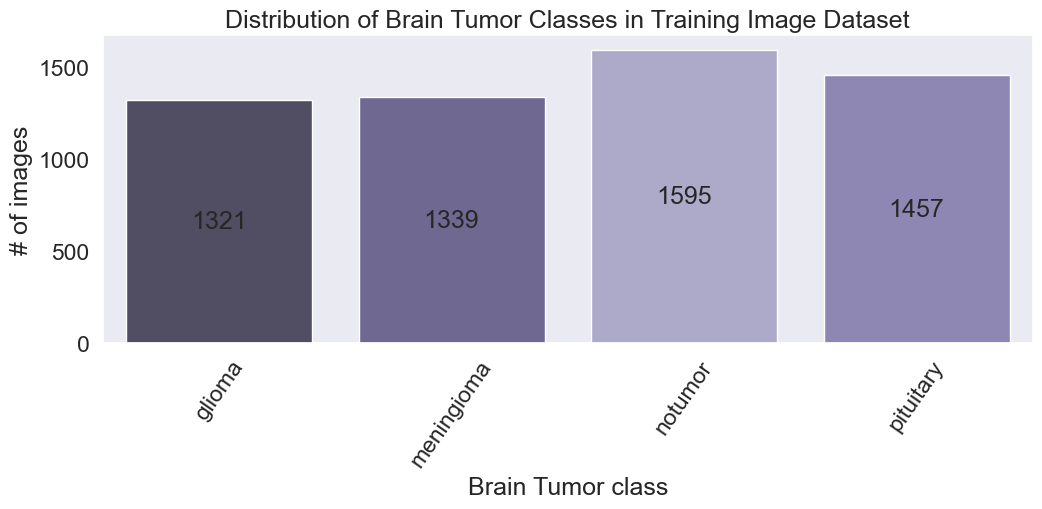

In [5]:
# Training's class frequency
plt.figure(figsize=(12,4))

labels = training_data.groupby("Label")["Image"].count()
pal = sns.color_palette("Purples_d", len(labels))
rank = labels.argsort().argsort()

ax = sns.barplot(x=[label_dict_Train[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
for i in ax.containers:
    ax.bar_label(i,label_type="center")

plt.title("Distribution of Brain Tumor Classes in Training Image Dataset")
plt.ylabel("# of images")
plt.xlabel("Brain Tumor class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

In [6]:
# Testing's class frequency
plt.figure(figsize=(12,4))

labels = testing_data.groupby("Label")["Image"].count()
pal = sns.color_palette("Purples_d", len(labels))
rank = labels.argsort().argsort()

ax = sns.barplot(x=[label_dict_Test[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
for i in ax.containers:
    ax.bar_label(i,label_type="center")

plt.title("Distribution of Brain Tumor Classes in Testing Image Dataset")
plt.ylabel("# of images")
plt.xlabel("Brain Tumor class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

[Text(0, 0, 'glioma'),
 Text(1, 0, 'meningioma'),
 Text(2, 0, 'notumor'),
 Text(3, 0, 'pituitary')]

## 2. Image Size Distribution

In [7]:
fig = plt.figure(figsize=(10,10),constrained_layout=True)
plt.suptitle('Image Size Distribution by Brain Tumor Class in Training Image Dataset',fontsize=20)

axes = fig.subplots(2,2)
fig_count=0
for tumor_type in label_dict_Train:
    # getting subplot index
    base2 = np.base_repr(fig_count,base=2).zfill(2)
    i= int(base2[0])
    j= int(base2[1])
    ax = axes[i][j]

    # getting distribution data by tumor class
    data = training_data[training_data['Label']==tumor_type][['width','height']]
    df_counts = data.groupby(['width','height']).size().reset_index()
    df_counts.columns.values[df_counts.columns == 0] = 'count'

    # plotting the scatterplot of image size distribution
    sns.scatterplot(ax=ax, x="width", y="height", hue='count', size='count', palette=sns.cubehelix_palette(rot=-.2, hue=1, as_cmap=True), data=df_counts)
    ax.set(title=label_dict_Train[tumor_type])
    
    fig_count+=1

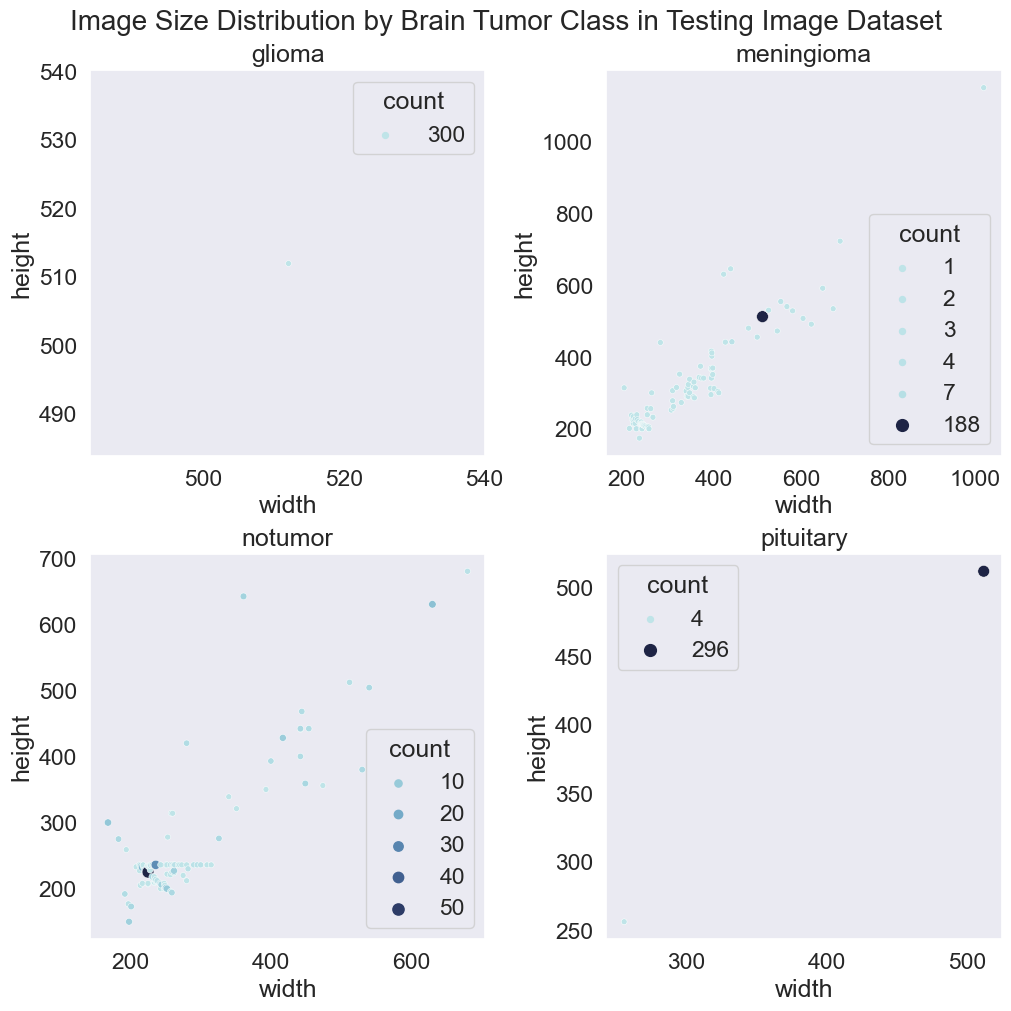

In [8]:
fig = plt.figure(figsize=(10,10),constrained_layout=True)
plt.suptitle('Image Size Distribution by Brain Tumor Class in Testing Image Dataset',fontsize=20)

axes = fig.subplots(2,2)
fig_count=0
for tumor_type in label_dict_Test:
    # getting subplot index
    base2 = np.base_repr(fig_count,base=2).zfill(2)
    i= int(base2[0])
    j= int(base2[1])
    ax = axes[i][j]

    # getting distribution data by tumor class
    data = testing_data[testing_data['Label']==tumor_type][['width','height']]
    df_counts = data.groupby(['width','height']).size().reset_index()
    df_counts.columns.values[df_counts.columns == 0] = 'count'

    # plotting the scatterplot of image size distribution
    sns.scatterplot(ax=ax, x="width", y="height", hue='count', size='count', palette=sns.cubehelix_palette(rot=-.2, hue=1, as_cmap=True), data=df_counts)
    ax.set(title=label_dict_Test[tumor_type])
    
    fig_count+=1

## 3. Sample Images per Brain Tumor Class in Training and Testing Image Dataset

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_images(image_df, y_names: dict, n=50, partition='Train'):
    fig = plt.figure(figsize=(20, 16), constrained_layout=True)
    fig.suptitle(f'Sample Images per Brain Tumor Class in {partition}ing Image Dataset')

    # create 4x1 subfigures
    subfigs = fig.subfigures(nrows=4, ncols=1)
    for tumor_code, subfig in zip(y_names.keys(), subfigs):
        label = y_names[tumor_code]
        subfig.suptitle(f'Brain Tumor: {label}')
        
        # create 10n subplots per subfig
        images = image_df[image_df['Label'] == tumor_code]['Image']
        n_images = images[:n]
        columns_n = 10
        rows_n = (n // columns_n) + (n % columns_n > 0)  # Calculate rows needed for n images
        axes = subfig.subplots(nrows=rows_n, ncols=columns_n)

        for i, image in enumerate(n_images):
            ax = axes[i // columns_n][i % columns_n]  # Calculate row and column indices
            image = cv2.resize(image, dsize=(240, 240), interpolation=cv2.INTER_CUBIC)
            ax.imshow(image)
            ax.tick_params(axis='both', which='both', 
                           top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False,
                           labelright=False)
            ax.grid(False)

    plt.show()

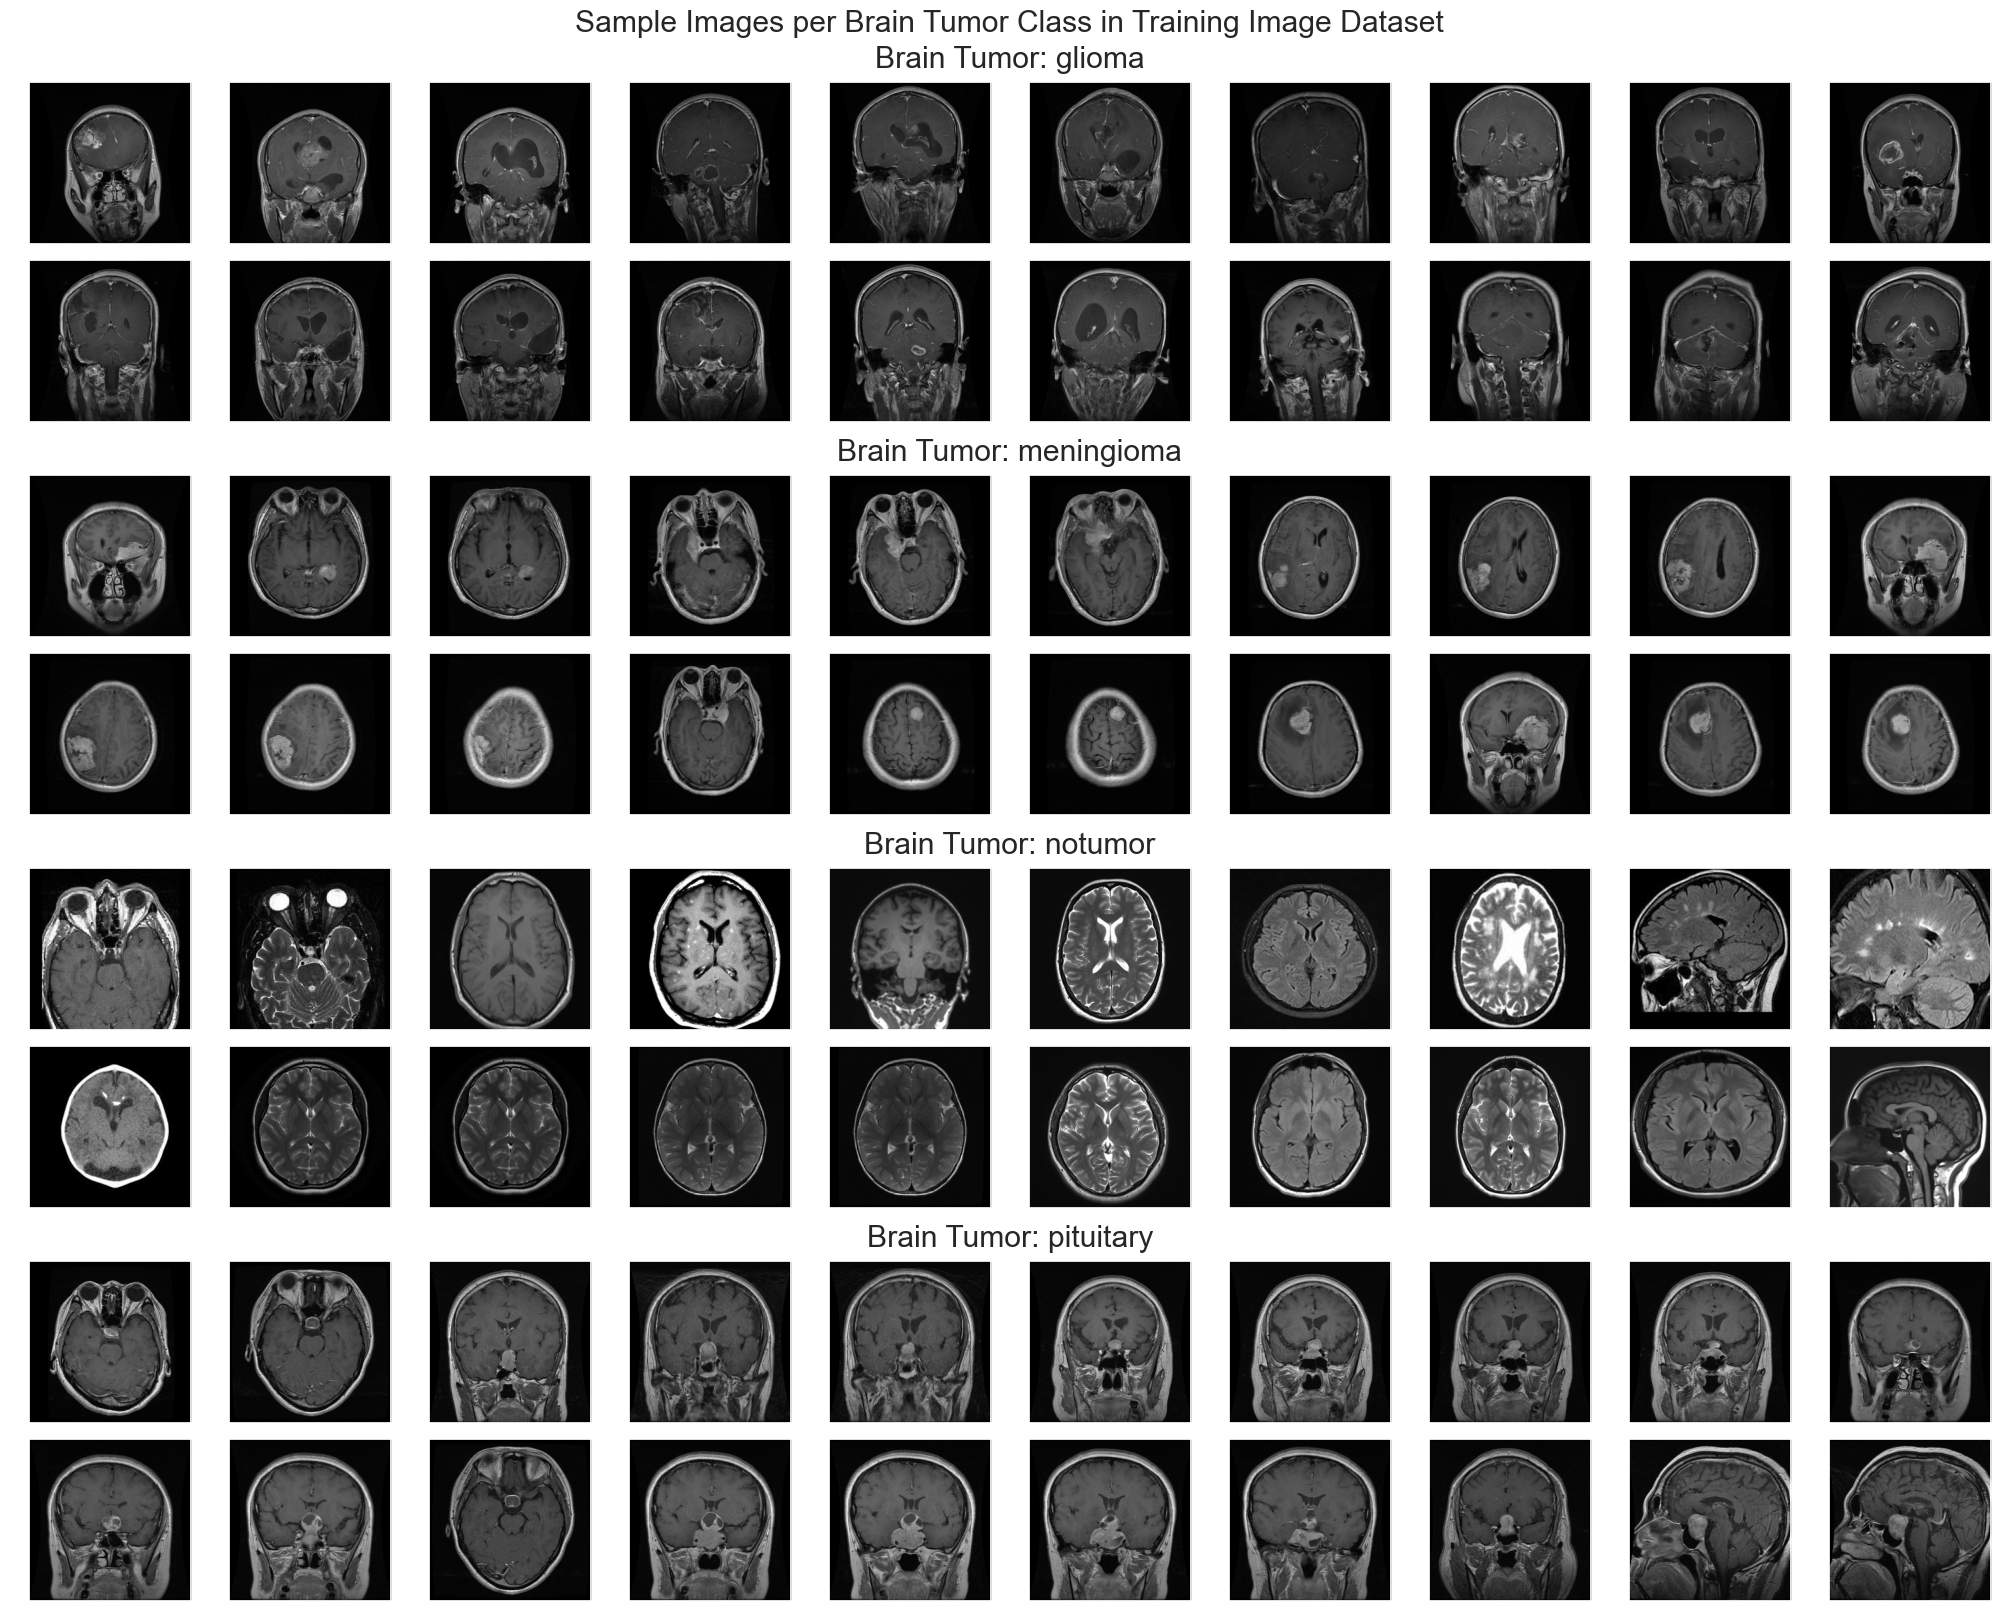

In [10]:
plot_sample_images(training_data, label_dict_Train,n=20)

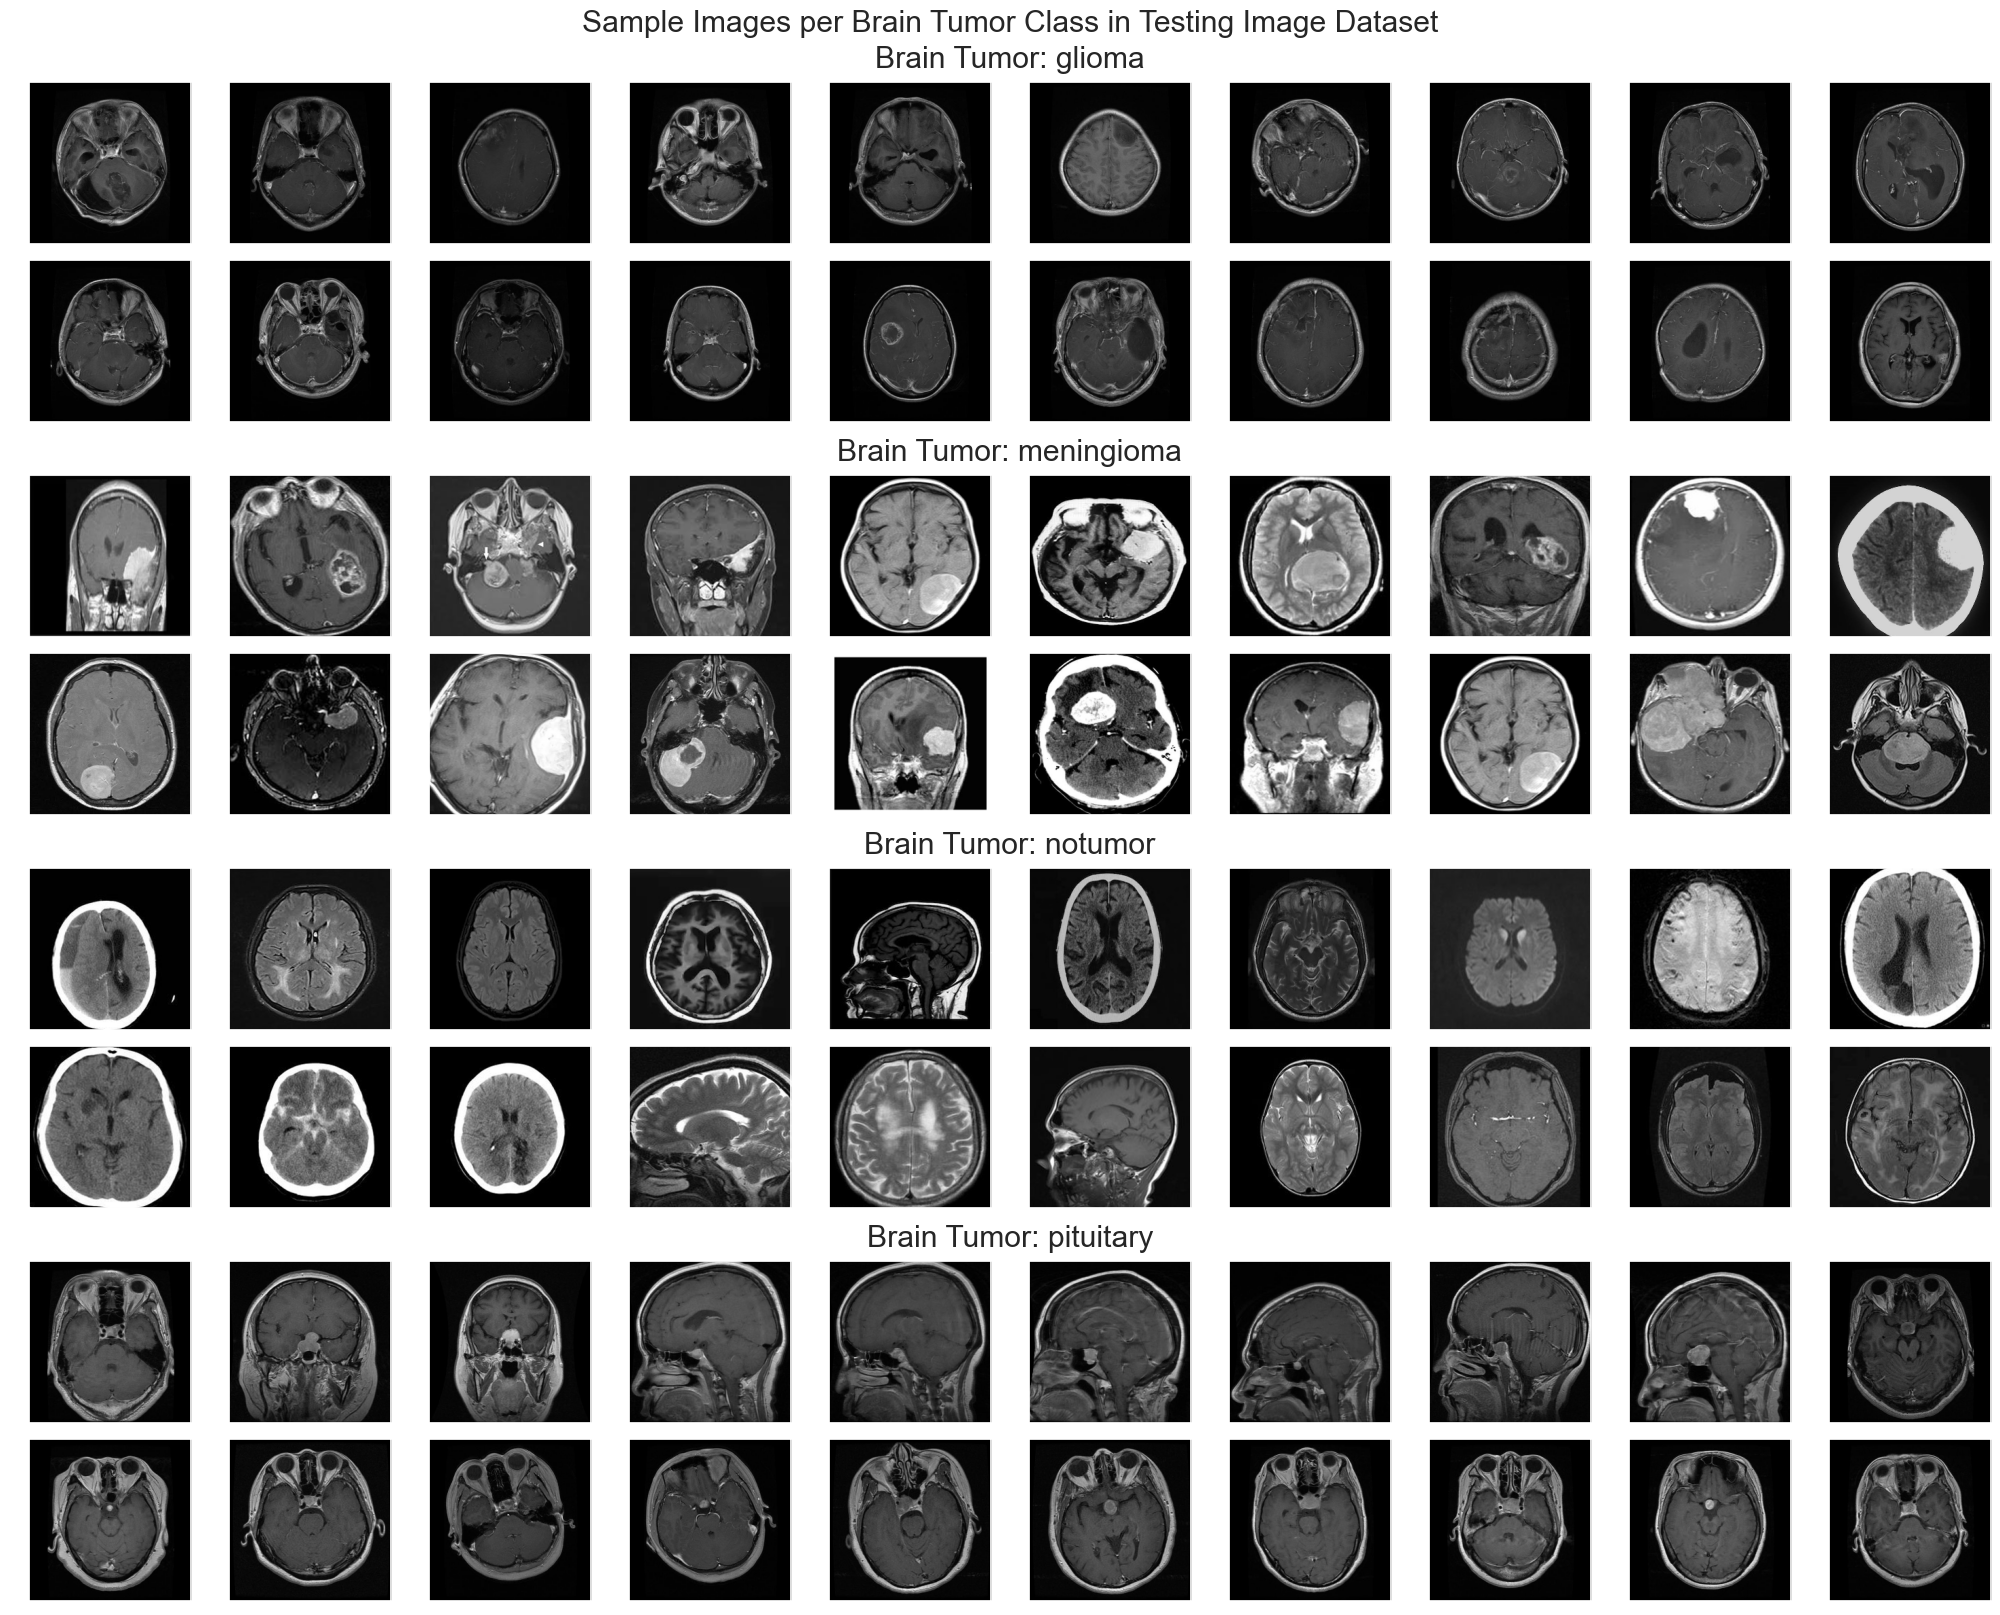

In [11]:
plot_sample_images(testing_data, label_dict_Test,n=20,partition='Test')